In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
files = []
import os
for dirname, _, filenames in os.walk('./ocean-eddy-detection'):
    for filename in filenames:
        if filename != '.DS_Store':
            print(os.path.join(dirname, filename))
            files.append(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./ocean-eddy-detection/OSSE_U_V_SLA_SST_train.nc
./ocean-eddy-detection/eddies_train.nc
./ocean-eddy-detection/OSSE_U_V_SLA_SST_test.nc


In [14]:
import xarray as xr
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

In [15]:
eddies_train = xr.open_dataset(files[1])
OSSE_test = xr.open_dataset(files[2])
OSSE_train = xr.open_dataset(files[0])
OSSE_train = OSSE_train.rename({"time_counter":"time"})

In [16]:
eddies_train

<xarray.Dataset>
Dimensions:  (time: 284, latitude: 357, longitude: 717)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-02T12:00:00 ... 2015-12-25T12:00:00
Dimensions without coordinates: latitude, longitude
Data variables:
    eddies   (time, latitude, longitude) float64 ...
Attributes:
    history:  Thu Feb 23 10:17:59 2023: ncks -C -v eddies U_V_SLA_Eddies_2015...
    NCO:      4.4.7

In [17]:
OSSE_train

<xarray.Dataset>
Dimensions:    (latitude: 357, longitude: 717, time: 284)
Coordinates:
    deptht     float32 ...
  * latitude   (latitude) float32 -1.084e-19 2.967 0.0 ... 3.689e+19 3.099 0.0
  * longitude  (longitude) float32 3.689e+19 -3.352 0.0 ... -3.221 0.0
  * time       (time) datetime64[ns] 2015-01-02T12:00:00 ... 2015-12-25T12:00:00
Data variables:
    vomecrtyT  (time, latitude, longitude) float32 ...
    vozocrtxT  (time, latitude, longitude) float32 ...
    sossheig   (time, latitude, longitude) float32 ...
    votemper   (time, latitude, longitude) float32 ...
Attributes:
    history:  Mon Feb 20 14:04:07 2023: ncks -A SST_2015_merged.nc SSH_U_V_20...
    NCO:      4.4.7

Text(0.5, 0.6, 'NatRun OSSE vs PyEddyTracker(NatRun) for 2015-01-03')

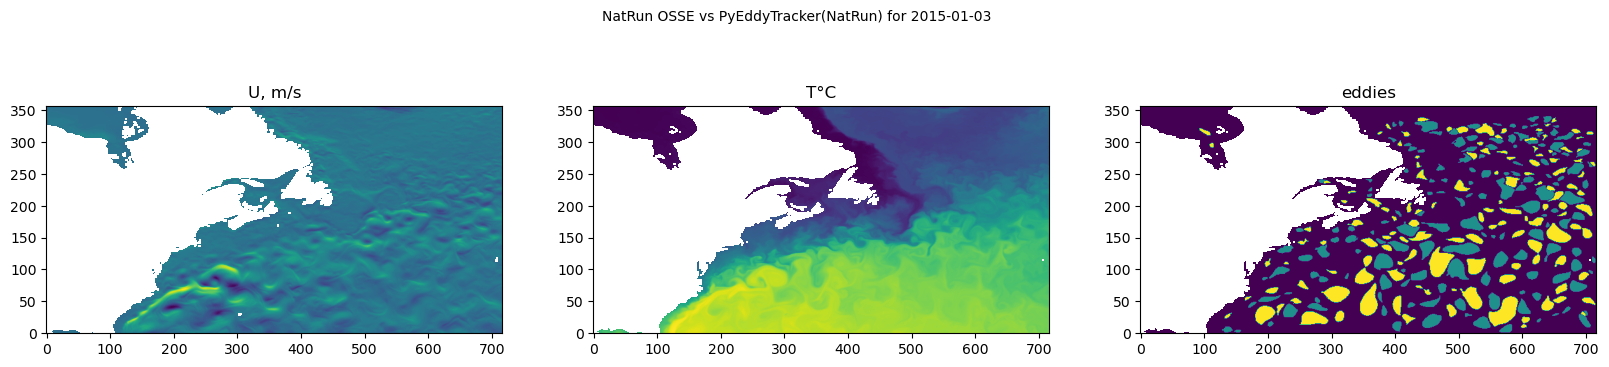

In [18]:
day = 1

fig, ax = plt.subplots(1, 3, figsize = (20, 20))
ax[0].imshow(OSSE_train.vozocrtxT.values[day], origin = "lower")#, extent = [lat_min, lon_min, lat_max, lon_max])
ax[0].set_title("U, m/s")
#ax[0].colorbar()
ax[1].imshow(OSSE_train.votemper.values[day], origin = "lower")#, extent = [lat_min, lon_min, lat_max, lon_max])
ax[1].set_title("T°C")
ax[2].imshow(eddies_train.eddies.values[day], origin = "lower")#, extent = [lat_min, lon_min, lat_max, lon_max])
ax[2].set_title("eddies")
fig.suptitle("NatRun OSSE vs PyEddyTracker(NatRun) for "+str(OSSE_train.time.values[day])[:10], fontsize = 10, y = 0.6)
#fig


Text(0, 0.5, 'Frequency')

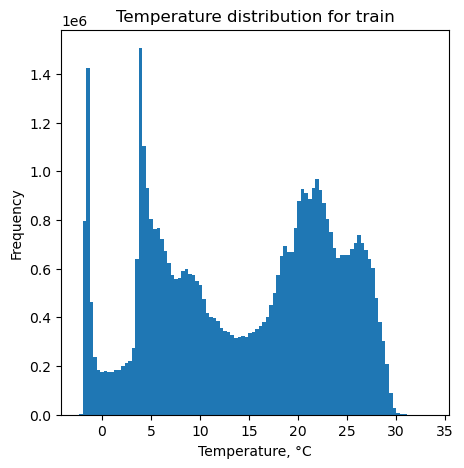

In [19]:
#plot histogram of temperature distribution for train
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
ax.hist(OSSE_train.votemper.values.flatten(), bins = 100)
ax.set_title("Temperature distribution for train")
ax.set_xlabel("Temperature, °C")
ax.set_ylabel("Frequency")
#fig


Text(0.5, 0.6, 'NatRun OSSE vs PyEddyTracker(NatRun) for 2015-01-03')

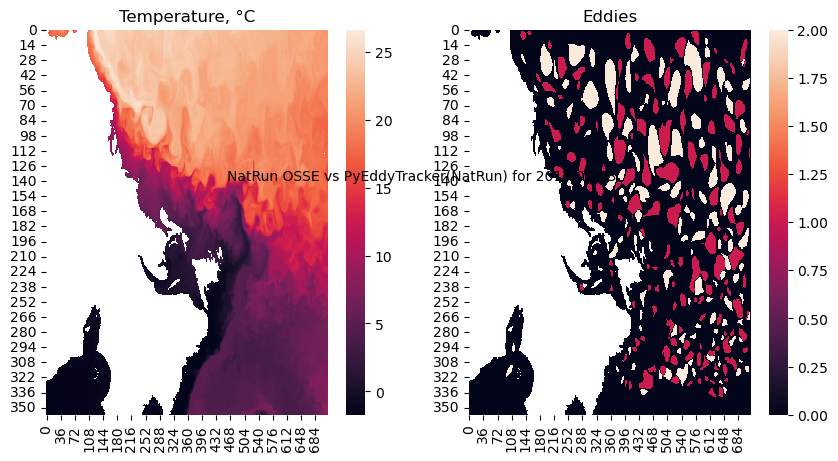

In [20]:
# plot heat map of temperature for an arbitrary day in train and eddies aside
day = 1

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sb.heatmap(OSSE_train.votemper.values[day], ax = ax[0])
ax[0].set_title("Temperature, °C")
sb.heatmap(eddies_train.eddies.values[day], ax = ax[1])
ax[1].set_title("Eddies")
fig.suptitle("NatRun OSSE vs PyEddyTracker(NatRun) for "+str(OSSE_train.time.values[day])[:10], fontsize = 10, y = 0.6)

Text(0.5, 1.0, 'Eddies')

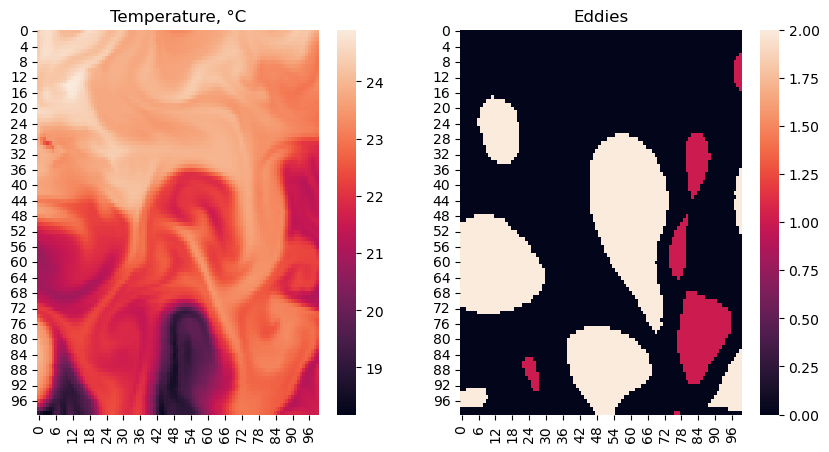

In [21]:
# zoom on a region of interest where eddies are present
lat_min, lat_max, lon_min, lon_max = 0, 100, 300, 400

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sb.heatmap(OSSE_train.votemper.values[day, lat_min:lat_max, lon_min:lon_max], ax = ax[0])
ax[0].set_title("Temperature, °C")
sb.heatmap(eddies_train.eddies.values[day, lat_min:lat_max, lon_min:lon_max], ax = ax[1])
ax[1].set_title("Eddies")
#fig.suptitle("NatRun OSSE vs PyEddyTracker(NatRun) for "+str(OSSE_train.time.values[day])[:10], fontsize = 10, y = 0.6)



/opt/homebrew/Caskroom/miniforge/base/envs/hackathon-sdd/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/Caskroom/miniforge/base/envs/hackathon-sdd/lib/python3.9/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Text(0.5, 1.0, 'Eddies')

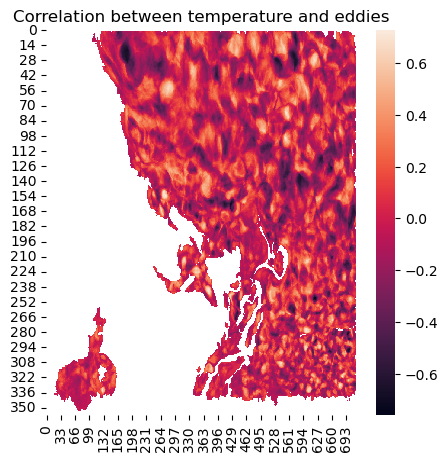

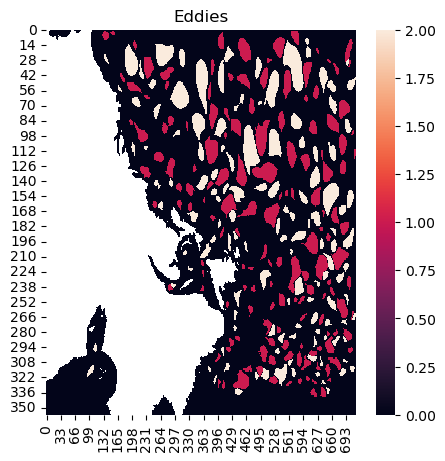

In [22]:
# search correlation between temperature and eddies
corr = np.zeros((OSSE_train.votemper.values.shape[1], OSSE_train.votemper.values.shape[2]))
for i in range(OSSE_train.votemper.values.shape[1]):
    for j in range(OSSE_train.votemper.values.shape[2]):
        corr[i, j] = np.corrcoef(OSSE_train.votemper.values[:, i, j], eddies_train.eddies.values[:, i, j])[0, 1]

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sb.heatmap(corr, ax = ax)
ax.set_title("Correlation between temperature and eddies")
#fig

# plot eddies for a given day
day = 1

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sb.heatmap(eddies_train.eddies.values[day], ax = ax)
ax.set_title("Eddies")
#fig.suptitle("NatRun OSSE vs PyEddyTracker(NatRun) for "+str(OSSE_train.time.values[day])[:10], fontsize = 10, y = 0.6)


Text(0.5, 1.0, 'Eddies distribution')

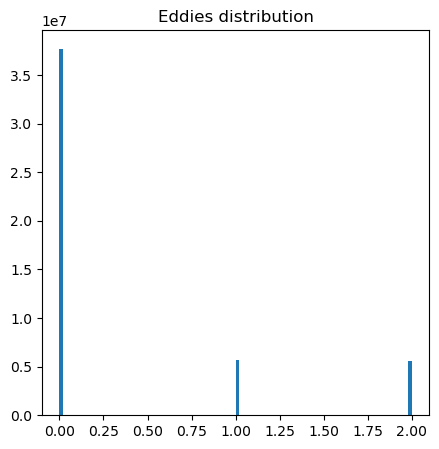

In [23]:
# histo of eddies 
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
ax.hist(eddies_train.eddies.values.flatten(), bins = 100)
ax.set_title("Eddies distribution")

In [28]:
# data features
print("OSSE_train features: ", OSSE_train.data_vars)

OSSE_train features:  Data variables:
    vomecrtyT  (time, latitude, longitude) float32 nan nan nan ... 0.1552 0.2156
    vozocrtxT  (time, latitude, longitude) float32 nan nan ... 0.03764 0.03859
    sossheig   (time, latitude, longitude) float32 nan nan ... -0.8333 -0.8229
    votemper   (time, latitude, longitude) float32 nan nan nan ... 8.276 8.354


Text(0.5, 1.0, 'Eddies')

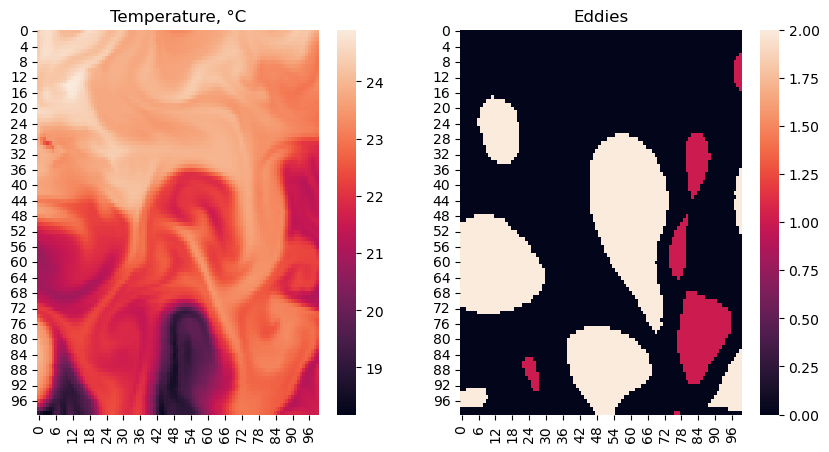

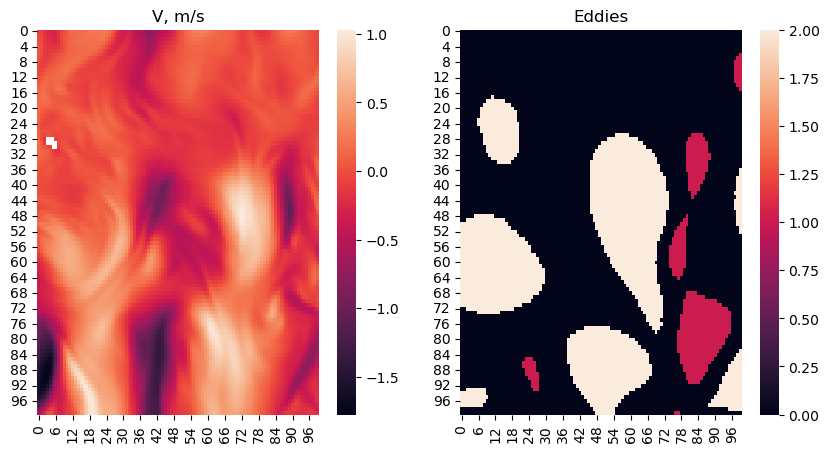

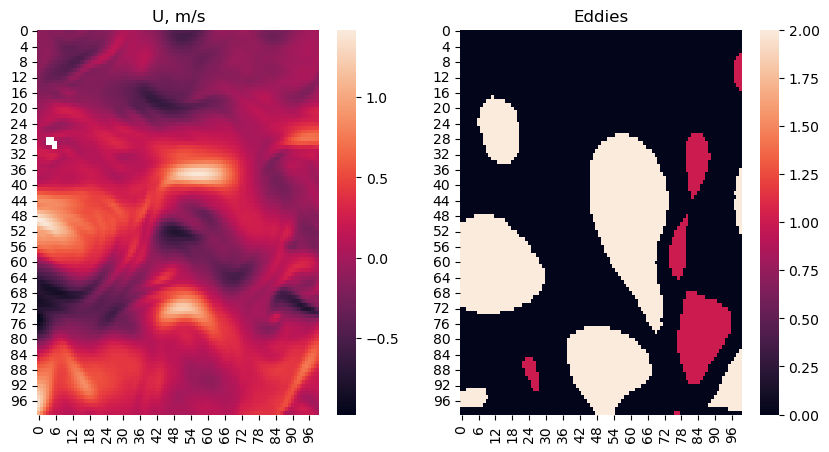

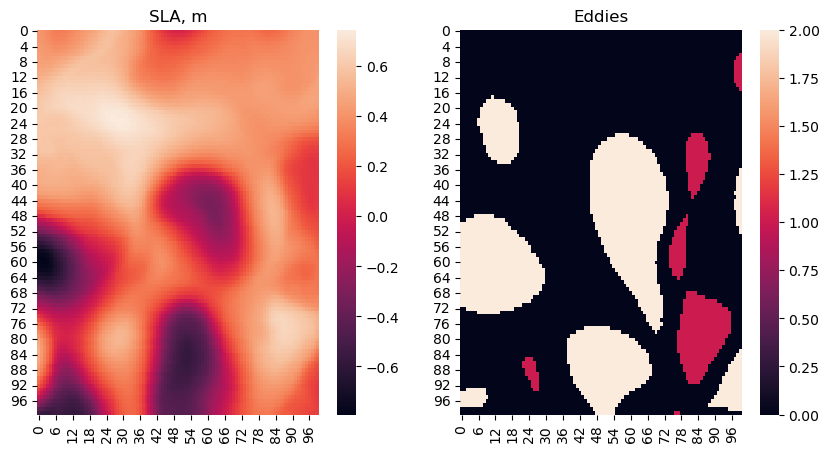

In [29]:
# zoom on a region of interest where eddies are present
lat_min, lat_max, lon_min, lon_max = 0, 100, 300, 400

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sb.heatmap(OSSE_train.votemper.values[day, lat_min:lat_max, lon_min:lon_max], ax = ax[0])
ax[0].set_title("Temperature, °C")
sb.heatmap(eddies_train.eddies.values[day, lat_min:lat_max, lon_min:lon_max], ax = ax[1])
ax[1].set_title("Eddies")

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sb.heatmap(OSSE_train.vomecrtyT.values[day, lat_min:lat_max, lon_min:lon_max], ax = ax[0])
ax[0].set_title("V, m/s")
sb.heatmap(eddies_train.eddies.values[day, lat_min:lat_max, lon_min:lon_max], ax = ax[1])
ax[1].set_title("Eddies")

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sb.heatmap(OSSE_train.vozocrtxT.values[day, lat_min:lat_max, lon_min:lon_max], ax = ax[0])
ax[0].set_title("U, m/s")
sb.heatmap(eddies_train.eddies.values[day, lat_min:lat_max, lon_min:lon_max], ax = ax[1])
ax[1].set_title("Eddies")

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sb.heatmap(OSSE_train.sossheig.values[day, lat_min:lat_max, lon_min:lon_max], ax = ax[0])
ax[0].set_title("SLA, m")
sb.heatmap(eddies_train.eddies.values[day, lat_min:lat_max, lon_min:lon_max], ax = ax[1])
ax[1].set_title("Eddies")
